# Analisis Expliratorio

##Importación de Librerias

In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()
from datetime import datetime, timedelta

## Importación de Base

### Descripción detallada del Dataset.

El dataset a trabajar se llama *FacturasSellOutRC* y esta guardado en el repositorio de [Github](https://raw.githubusercontent.com/Wvanegaz23/Metodos) y el cual tiene las ventas del primer semestre del año 2022 de la linea de chocolate de mesa de la red de venta de supermercados de la RedContigo, estrategia de la empresa Colombiana de comercio y la cual cuenta con aproximadamente 250 establecimientos a nivel nacional, este dataset esta compuesto de la ventas diarias y por horas de los primeros 6 meses del año 2022, con este dataset nuestro objetivo es poder crear un modelo de predicción utilizando Series de tiempo.

In [2]:
fact= pd.read_csv('https://raw.githubusercontent.com/Wvanegaz23/Metodos/main/FacturasSellOutRC.csv')
fact1= pd.read_csv('https://raw.githubusercontent.com/Wvanegaz23/Metodos/main/FacturasSellOutRC1.csv')
factOK = pd.concat([fact,fact1])

**Exploración de la cabecera del DataFrame**

In [3]:
factOK.head()

,LLAVE_CLIENTE,LLAVE_PRODUCTO,CANTIDAD,VALOR_UNITARIO,VALOR,FECHA_DOCUMENTO,DESCRIPCION_PRODUCTO,SUBLINEA,DESC_PROVEEDOR,MUNICIPIO,CIUDAD,DEPARTAMENTO,DIA_SEMANA,NOMBRE_MES
0,2118326,17616079.0,1.0,5294.118,5294.118,2022-01-05 15:49:55,Chocolate Resellable Corona x 500G ...,CORONA,Comercial Nutresa S.A.S.,San Andres,BOGOTÁ D.C.,SANTAFE DE BOGOTA,Wednesday,January
1,2115963,17616079.0,1.0,6095.238,6095.238,2022-01-05 15:25:13,Chocolate Resellable Corona x 500G ...,CORONA,Comercial Nutresa S.A.S.,Cogua,COGUA,CUNDINAMARCA,Wednesday,January
2,21198847,17783859.0,1.0,5809.524,5809.524,2022-01-05 15:42:51,Chocolate Sol x 500GR ...,SOL,CASALUKER,Lisboa Occidental,BOGOTÁ D.C.,SANTAFE DE BOGOTA,Wednesday,January
3,2115565,17868388.0,1.0,3529.412,3529.412,2022-01-05 15:57:43,DON SABROSO TRADICIONAL 500G P16 ...,DON SABROSO,CASALUKER,La Fragua,SOACHA,CUNDINAMARCA,Wednesday,January
4,2115534,17616079.0,1.0,5428.571,5428.571,2022-01-05 15:54:53,Chocolate Resellable Corona x 500G ...,CORONA,Comercial Nutresa S.A.S.,Cundinamarca,BOGOTÁ D.C.,SANTAFE DE BOGOTA,Wednesday,January


### Identificación explicita de las variables

In [7]:
factOK.columns #Número de varibles totales en el dataFrame

Index(['LLAVE_CLIENTE', 'LLAVE_PRODUCTO', 'CANTIDAD', 'VALOR_UNITARIO',
       'VALOR', 'FECHA_DOCUMENTO', 'DESCRIPCION_PRODUCTO', 'SUBLINEA',
       'DESC_PROVEEDOR', 'MUNICIPIO', 'CIUDAD', 'DEPARTAMENTO', 'DIA_SEMANA',
       'NOMBRE_MES'],
      dtype='object')

In [8]:
factOK.shape #Dimención total del dataFrame

(238716, 14)

### El dataframe cuenta con 14 variables ###
 
- **LLAVE_CLIENTE:** Dato que registra el código de los diferentes clientes que se registran en base.</p>
- **LLAVE_PRODUCTO:** Dato que registra el código de los diferentes productos que se registran en base.</p>
- **CANTIDAD:** Cantidad de las unidades vendidas en cada una de horas y días del reporte</p>
- **VALOR_UNITARIO:** Valor que se registra del valor unitario de los datos de cada uno de los productos</p>
- **VALOR** Valor que se calcula de los movimiento de cada linea la forma del calculo es el siguiente $$ Cantidad * Valor unitario $$</p>
- **FECHA_DOCUMENTO** Fecha y hora del registro de cada venta registro del *01/01/2022 al 30/06/2022*</p>
- **DESCRIPCION_PRODUCTO** Descripción de cada uno de los productos que se registran en la ventas</p>
- **SUBLINEA:** Grupo de productos que comparten una misma marca</p>
- **DESC_PROVEEDOR** Dato referente a cada uno de los diferentes proveedores de los productos</p>
- **MUNICIPIO** En el registro de la base es el barrio en el que se hizo la venta</p>
- **CIUDAD** Resgistro de la ciudad en la que se esta haciendo la venta</p>
- **DEPARTAMENTO** Departamento en donde se esta registrando la venta</p>
- **DIA_SEMANA** Día de la semana *(Lunes a Domingo)* en los que se esta registrando cada uno de los datos de venta</p>
- **NOMBRE_MES** Meses de la del primer semestre  *(Enero 2022 a Junio 2022)* en los que se esta registrando cada uno de los datos de venta</p>

### Para una correcta manipulación de los datos ###

1. Se modificaron el tipo de datos de 3 Variables:
- **LLAVE_CLIENTE:** La pasa de *int* a *str* por que no se van a hacer calculos con esos registros
- **LLAVE_PRODUCTO:** La pasa de *int* a *str* por que no se van a hacer calculos con esos registros
- **FECHA_DOCUMENTO:** Para el manejo de los datos de la serie de tiempo cambiamos el tipo de dato de *str* a *datatime*

In [9]:
factOK['LLAVE_CLIENTE'] =str(factOK['LLAVE_CLIENTE']) #Cambio de la variable LLAVE_CLIENTE que estaba como float a str
factOK['LLAVE_PRODUCTO'] =str(factOK['LLAVE_PRODUCTO']) #Cambio de la variable LLAVE_PRODUCTO que estaba como float a str
factOK['FECHA_DOCUMENTO'] = pd.to_datetime(factOK['FECHA_DOCUMENTO'], format = '%Y-%m-%d')

## Información que contiene el dataframe ##

In [10]:
factOK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238716 entries, 0 to 134768
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   LLAVE_CLIENTE         238716 non-null  object        
 1   LLAVE_PRODUCTO        238716 non-null  object        
 2   CANTIDAD              238716 non-null  float64       
 3   VALOR_UNITARIO        238716 non-null  float64       
 4   VALOR                 238716 non-null  float64       
 5   FECHA_DOCUMENTO       238716 non-null  datetime64[ns]
 6   DESCRIPCION_PRODUCTO  238716 non-null  object        
 7   SUBLINEA              238716 non-null  object        
 8   DESC_PROVEEDOR        238716 non-null  object        
 9   MUNICIPIO             238716 non-null  object        
 10  CIUDAD                238716 non-null  object        
 11  DEPARTAMENTO          238716 non-null  object        
 12  DIA_SEMANA            238716 non-null  object        
 13 

In [ ]:
factOK[factOK['FECHA_DOCUMENTO'] == '2022-04-09 18:45:09']

In [11]:
STiempo = factOK.pivot_table(
    index = ['FECHA_DOCUMENTO','DIA_SEMANA','DESC_PROVEEDOR'],
    aggfunc=np.sum,
    fill_value=False)
STiempo = STiempo.reset_index(level=['DIA_SEMANA','DESC_PROVEEDOR'])

In [12]:
STiempo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 193888 entries, 2022-01-01 08:15:45 to 2022-06-30 22:46:02
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DIA_SEMANA      193888 non-null  object 
 1   DESC_PROVEEDOR  193888 non-null  object 
 2   CANTIDAD        193888 non-null  float64
 3   VALOR           193888 non-null  float64
 4   VALOR_UNITARIO  193888 non-null  float64
dtypes: float64(3), object(2)
memory usage: 8.9+ MB


In [ ]:
STiempo.describe()

In [13]:
maximos = STiempo.loc[STiempo["CANTIDAD"].idxmax()]
maximos

DIA_SEMANA                         Saturday
DESC_PROVEEDOR    Comercial Nutresa  S.A.S.
CANTIDAD                              128.0
VALOR                              49999.36
VALOR_UNITARIO                       781.24
Name: 2022-04-09 18:45:09, dtype: object

In [14]:
minimos = STiempo.loc[STiempo["CANTIDAD"].idxmin()]
minimos

,DIA_SEMANA,DESC_PROVEEDOR,CANTIDAD,VALOR,VALOR_UNITARIO
FECHA_DOCUMENTO,,,,,
2022-01-21 10:14:20,Friday,CASALUKER,-3.0,-18285.714,6095.238
2022-01-21 10:14:20,Friday,Comercial Nutresa S.A.S.,3.0,19714.287,6571.429


# **Valores Medios en la Serie de Tiempo (Dias, Meses, Año)**

In [15]:
MEAND = STiempo.resample('d').mean()

In [16]:
MEANM = STiempo.resample('m').mean()

In [17]:
MEANY = STiempo.resample('y').mean()

# **Valores Maximos en la Serie de Tiempo (Dias, Meses, Año)**

In [18]:
MAXD = STiempo.resample('d').max()

In [19]:
MAXM = STiempo.resample('m').max()

In [20]:
MAXY = STiempo.resample('y').max()

# **Valores Minimos en la Serie de Tiempo (Dias, Meses, Año)**

In [21]:
MIND = STiempo.resample('d').min()

In [22]:
MINM = STiempo.resample('m').min()

In [23]:
STiempo.resample('y').min().head()

,DIA_SEMANA,DESC_PROVEEDOR,CANTIDAD,VALOR,VALOR_UNITARIO
FECHA_DOCUMENTO,,,,,
2022-12-31,Friday,CASALUKER,-3.0,-18285.714,100.0


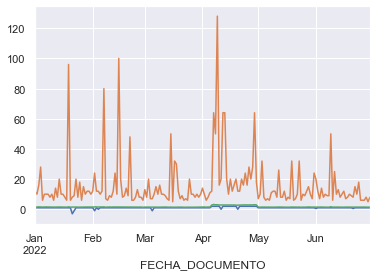

In [24]:
MIND['CANTIDAD'].plot();
MAXD['CANTIDAD'].plot();
MEAND['CANTIDAD'].plot();

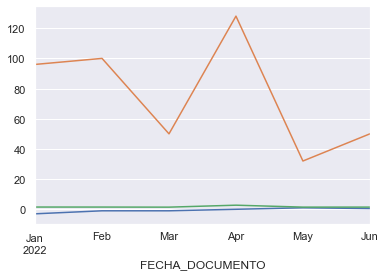

In [25]:
MINM['CANTIDAD'].plot();
MAXM['CANTIDAD'].plot();
MEANM['CANTIDAD'].plot();

In [ ]:
plt.figure(figsize=(20,10))
STiempo['CANTIDAD'].plot(alpha = 0.5),
MIND['CANTIDAD'].plot(label = 'Minimo'),
MAXD['CANTIDAD'].plot(label = 'Máximo'),
plt.title("Cantidad Vendida"),
plt.legend()
plt.grid(which='major', axis='both')
plt.show();

In [ ]:
STiempo.boxplot();

In [ ]:
plt.figure(figsize=(20,4))
STiempo['VALOR'].plot(),
plt.title('Valor unitario'),
plt.legend(),
plt.xlabel('Fecha')
plt.ylabel('Valor unitario')
plt.grid(which='major', axis='both')
plt.show();

In [ ]:
plt.figure(figsize=(20,4))
STiempo['VALOR_UNITARIO'].plot();
plt.title("Valor Unitario");

In [ ]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Fecha', ylabel='Valor', dpi=100):
    plt.figure(figsize=(20,4), dpi=dpi)
    plt.plot(x, y, color='tab:red', alpha = 0.5)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.grid(which='major', axis='both')
    plt.show()

plot_df(STiempo, x=STiempo.index, y=STiempo['VALOR'], title='Venta en cantidades 2022-Ene a 2022-Jun')    

## Analisis exploratorio con Pandas Profile

In [ ]:
factOK.describe()

In [ ]:
factOK.shape

In [ ]:
factOK['CANTIDAD'].describe()

In [ ]:
factOK['VALOR_UNITARIO'].describe()

In [ ]:
fig, ax = plt.subplots(figsize = (19, 8))
sns.barplot(x='DIA_SEMANA',y='CANTIDAD',data=factOK,ax = ax,hue='DESC_PROVEEDOR');
plt.xticks(rotation=90);

In [ ]:
sns.boxplot(y='VALOR_UNITARIO',data=STiempo);

In [ ]:
sns.boxplot(y='CANTIDAD',data=factOK);

In [ ]:
fig, ax = plt.subplots(figsize = (19, 8))
sns.boxplot(x='DESC_PROVEEDOR',y='VALOR_UNITARIO',data=factOK);
plt.xticks(rotation=90);

In [ ]:
fig, ax = plt.subplots(figsize = (19, 8))
sns.histplot(factOK['VALOR_UNITARIO']);

In [ ]:
factOK[factOK['CANTIDAD']<=0].count()

In [ ]:
fig, ax = plt.subplots(figsize = (19, 8))
sns.kdeplot(data=factOK['CANTIDAD'], shade=True);

In [ ]:
fig, ax = plt.subplots(figsize = (19, 8))
sns.violinplot(x='DESC_PROVEEDOR',y='CANTIDAD',data=factOK);
plt.xticks(rotation=90);

In [ ]:
fig, ax = plt.subplots(figsize = (19, 8))
sns.regplot(x=factOK['VALOR_UNITARIO'], y=factOK['CANTIDAD']);

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
prof = ProfileReport(factOK)

In [ ]:
prof

In [ ]:
corr_df = factOK.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(factOK.corr())
from datetime import datetime, timedelta


In [ ]:
fig, ax = plt.subplots(figsize = (19, 8))
sns.barplot(x='DIA_SEMANA',y='CANTIDAD',data=factOK);
plt.xticks(rotation=90);

In [ ]:
pd.to_datetime(factOK['FECHA_DOCUMENTO'],datetime.date)

# Descripción escrita y grafica de los datos faltantes.

#Uso de técnicas para imputar

## Métodos de imputación simples
**Imputación mediante la media:** se reemplazan los valores perdidos por la media de los valores observados.

**Imputación mediante regresión:** se estima una regresión de las observaciones existentes y se imputa cada valor perdido mediante la ecuación de regresión estimada.

**Imputación mediante regresión estocástica:** similar al enterior pero se imputa añadiendo a la predicción un valor residual para reestablecer la pérdida de variabilidad.

**Imputación mediante médias móviles:** se reemplazan las observaciones faltantes por los valores estimados mediante médias móviles.

**Imputación por Last Observation Carried Forward (locf):** reemplaza el dato perdido por la observacion que le precede.

**Imputación por interpolación:** se estiman los valores perdidos interpolando (uniendo de manera lineal, polinomial, etc.) el último valor válido antes del valor perdido y el primer valor válido después del valor perdido.

### Métodos de imputación basados en máxima verosimilitud

**Imputación múltiple:** consiste en realizar varias imputaciones de las observaciones faltantes para luego analizar los conjuntos de datos completados y combinar los resultados obtenidos para obtener una estimacion final. El análisis de imputación múltiple esta dividido en tres fases: fase de imputacion, fase de análisis y fase de puesta en común.

**Imputación mediante el algoritmo EM (Expectation-Maximization):** es un algoritmo importante para el análisis de datos faltantes. Es un método iterativo de dos pasos (esperanza y maximizacion) donde se comienza por reemplazar los datos ausentes por unos valores estimados y a continuación se procede a una primera estimación de los parámetros, para con estos parámetros volver a iniciar al primer paso y así sucesivamente hasta que la convergencia de los parámetros sea aceptable.

### Métodos de imputación basados en machine learning
**Imputación con K-Nearest Neighbor:** se estiman los valores peridos con la media de los vecinos seleccionados.

**Imputación con K-means**
**Imputación con máquinas de soporte vectorial**
En el ámbito de la imputación, la imputación en series temporales univariantes es un reto adicional, debido a que la mayoría de algoritmos complejos están desarrollados para series temporales multivariantes ya que dependen de la correlación entre los inter-atributos para estimar los valores de los datos perdidos (imputación múltiple, EM, kNN, etc.), algo que no ocurre en el caso univariante (al ser un único atributo). Pero además de los métodos simples, también hay posibilidades adicionales más complejas para la imputación en series temporales univariantes:

**Algoritmos multivariantes con datos retardados:** consisten en emplear indirectamente los algoritmos de series multivariantes en series univariantes empleando el tiempo (variable implícita de una serie temporal) como un atributo más. La forma habitual de hacer esto es mediante lags (variables que toman el valor de otra variable en un instante de tiempo previo) y leads (toman el valor de otra variable en un instante de tiempo posterior).

**Filtro de Kalman con modelos ARIMA de espacio de estados:** todos los modelos ARIMA pueden ser reescritos (y estimados) como modelos en el espacio de estados. Estos modelos en el espacio de estados pueden entre otras muchas cosas estimar observaciones perdidas. Luego los principales beneficios de representar sistemas dinámicos en forma de espacio de estados es que el espacio de estados permite que las variables no observadas puedan ser incorporadas y estimadas junto con el modelo observable, y que además, estos modelos en el espacio de estados pueden ser analizados usando un algoritmo recursivo llamado filtro de Kalman (Kalman filter), que es usado, entre otras cosas, para determinar las estimaciones óptimas de los modelos en el espacio de estados.

(RPubs - Imputación Series de Tiempo, 2021)

[RPubs - Imputación Series de Tiempo. (2021, September 2). Rpubs.com.](https://rpubs.com/wilsonsr/804544#:~:text=M%C3%A9todos%20de%20imputaci%C3%B3n%20simples,la%20ecuaci%C3%B3n%20de%20regresi%C3%B3n%20estimada.)

‌

Descripción escrita y grafica de los datos atípicos.


Uso técnicas para tratar atípicos.


Análisis de estacionalidad de la serie de tiempo 


Procesamiento de estacionariedad.


Análisis de tendencia de la serie de tiempo


Procesamiento de eliminación de tendencia.


Análisis de periodicidad de  la serie de tiempo


Análisis de autocorrelación.


Estimación de la predictibilidad de la serie de tiempo. 


Uso de resultados de preprocesamiento para toma de decisiones

de, U. (2022). Predicción de series temporales con machine learning [YouTube Video]. In YouTube. https://www.youtube.com/watch?v=MlktVhReO0E

‌